In [1]:
#### import scanpy as sc
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import figure
import numpy as np
import glob as glob

# DropSeq

In [3]:
sorted(glob.glob('demultiplexed_dropseq_sub_whitelist/*.Solo.out/Gene/Summary.csv'))

['demultiplexed_dropseq_sub_whitelist/SRR1853178.Solo.out/Gene/Summary.csv',
 'demultiplexed_dropseq_sub_whitelist/SRR1853179.Solo.out/Gene/Summary.csv',
 'demultiplexed_dropseq_sub_whitelist/SRR1853180.Solo.out/Gene/Summary.csv',
 'demultiplexed_dropseq_sub_whitelist/SRR1853181.Solo.out/Gene/Summary.csv',
 'demultiplexed_dropseq_sub_whitelist/SRR1853182.Solo.out/Gene/Summary.csv',
 'demultiplexed_dropseq_sub_whitelist/SRR1853183.Solo.out/Gene/Summary.csv',
 'demultiplexed_dropseq_sub_whitelist/SRR1853184.Solo.out/Gene/Summary.csv']

In [4]:
metadata = []
for filename in sorted(glob.glob('demultiplexed_dropseq_sub_whitelist/*.Solo.out/Gene/Summary.csv')):
    x = pd.read_csv(filename, header=None, index_col = 0)
    sample=filename.replace('demultiplexed_dropseq_sub_whitelist/SRR18531', '')
    sample=sample.replace('.Solo.out/Gene/Summary.csv', '')
    x.columns = [sample]
    metadata.append(x)

metadata = pd.concat(metadata, axis = 1)
metadata = metadata.T

In [5]:
metadata

,Number of Reads,Reads With Valid Barcodes,Sequencing Saturation,Q30 Bases in CB+UMI,Q30 Bases in RNA read,Reads Mapped to Genome: Unique+Multiple,Reads Mapped to Genome: Unique,Reads Mapped to Transcriptome: Unique+Multipe Genes,Reads Mapped to Transcriptome: Unique Genes,Estimated Number of Cells,Reads in Cells Mapped to Unique Genes,Fraction of Reads in Cells,Mean Reads per Cell,Median Reads per Cell,UMIs in Cells,Mean UMI per Cell,Median UMI per Cell,Mean Genes per Cell,Median Genes per Cell,Total Genes Detected
78,348070800.0,0.438338,0.802721,0.763639,0.620943,0.545695,0.545695,0.189384,0.184095,2835.0,43441146.0,0.677940,15323.0,11890.0,7760215.0,2737.0,2030.0,1547.0,1298.0,22008.0
79,474642000.0,0.472913,0.835262,0.771174,0.620949,0.543406,0.543406,0.211438,0.205259,2383.0,58081056.0,0.596165,24373.0,18995.0,8249998.0,3462.0,2639.0,1846.0,1603.0,22285.0
80,322756560.0,0.503067,0.880514,0.787011,0.566501,0.542113,0.542113,0.219080,0.212778,1753.0,44625739.0,0.649805,25456.0,19192.0,4509862.0,2572.0,1885.0,1469.0,1228.0,21628.0
81,403445700.0,0.578215,0.735563,0.743126,0.608497,0.332305,0.332305,0.147068,0.143087,1904.0,35197856.0,0.609721,18486.0,13767.0,8463671.0,4445.0,3277.0,2136.0,1835.0,22185.0
82,403445700.0,0.529607,0.818202,0.828078,0.637601,0.535420,0.535420,0.239946,0.233264,2335.0,60681195.0,0.644794,25987.0,20242.0,10165214.0,4353.0,3258.0,2116.0,1810.0,22640.0
83,436670640.0,0.608171,0.898480,0.838650,0.591365,0.551566,0.551566,0.303512,0.295338,2377.0,84715715.0,0.656886,35639.0,27523.0,7397081.0,3111.0,2310.0,1720.0,1456.0,22139.0
84,210952000.0,0.335440,0.682060,0.788351,0.600760,0.562336,0.562336,0.161819,0.156963,1962.0,22170916.0,0.669581,11300.0,8203.0,6629449.0,3378.0,2419.0,1751.0,1468.0,20655.0


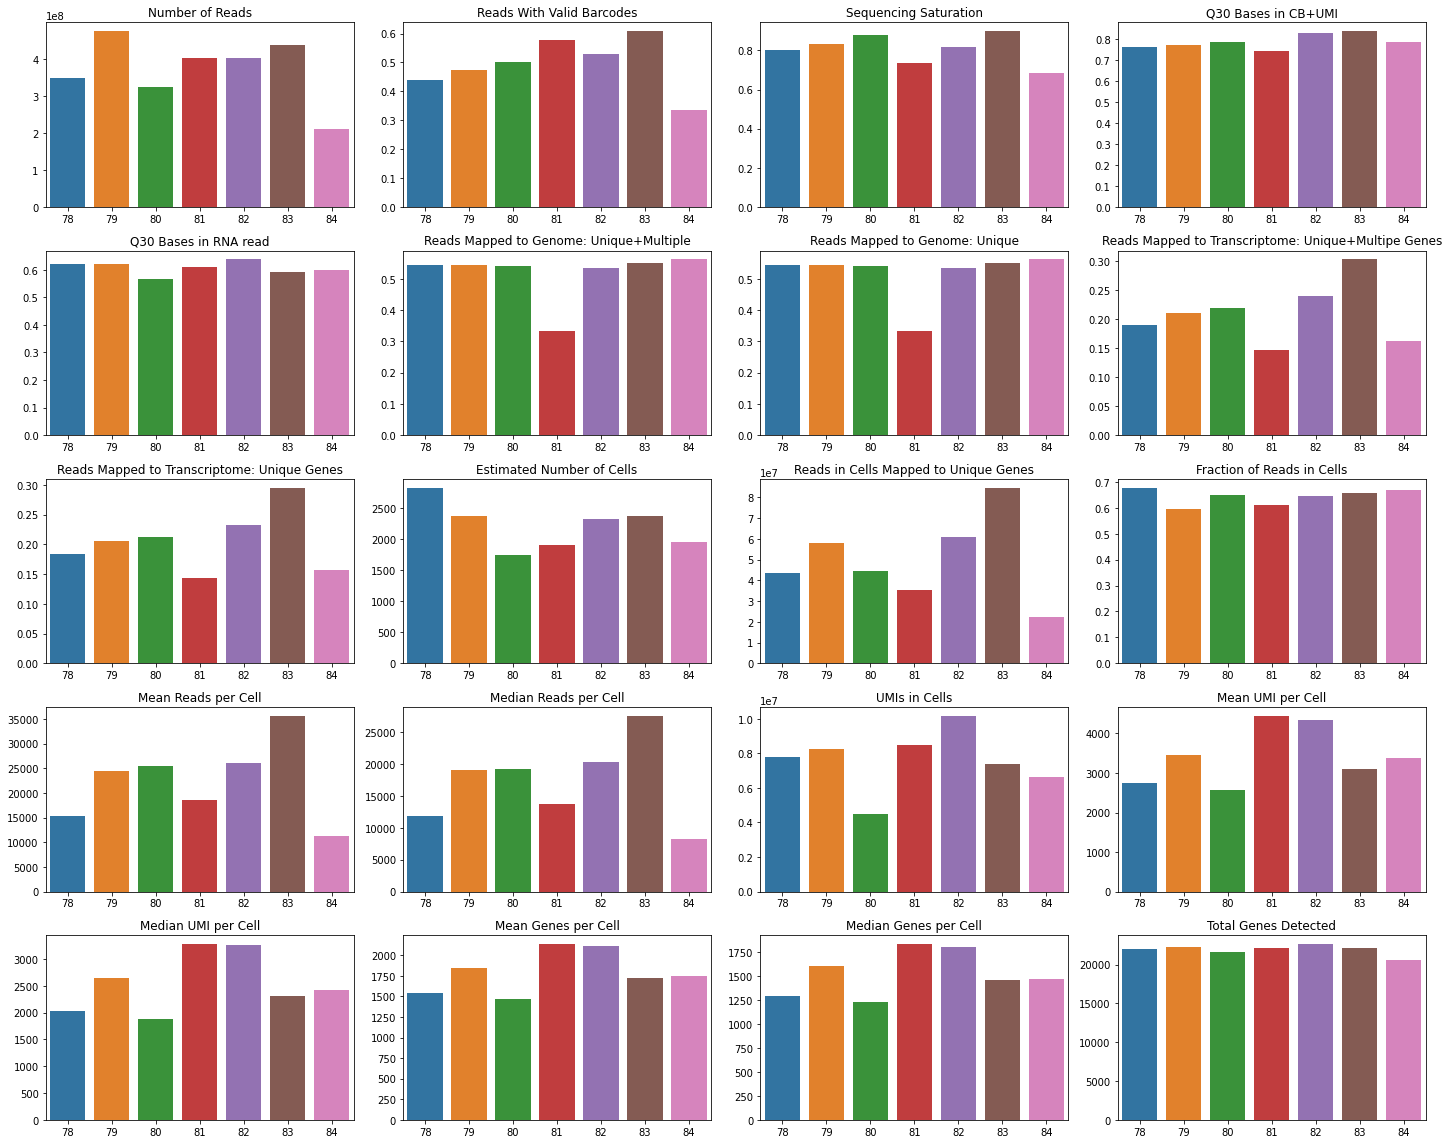

In [6]:
fig, axes =plt.subplots(5,4, figsize=(20,16))
axes = axes.flatten()
for statistic in range(0,metadata.shape[1]):
    sns.barplot(y = metadata[metadata.columns[statistic]], 
                x = metadata.index,
                ax = axes[statistic]
               ).set_title(metadata.columns[statistic])
    axes[statistic].set_ylabel('')
    # axes[statistic].get_xaxis().set_ticklabels([])

plt.tight_layout()
plt.gcf()
plt.savefig('plts_python/dropseq_starsoloqc_sub_whitelist.png', dpi=150)
plt.show()
plt.close()

In [7]:
barcode_rank = []

for filename in sorted(glob.glob('demultiplexed_dropseq_sub_whitelist/*.Solo.out/Gene/UMIperCellSorted.txt')):
    x = pd.read_csv(filename, header=None)
    sample=filename.replace('demultiplexed_indrop/SRR18531', '')
    sample=sample.replace('.Solo.out/Gene/UMIperCellSorted.txt', '')
    x.columns = [sample]
    barcode_rank.append(x)

barcode_rank_df = pd.concat(barcode_rank, axis = 1)

In [8]:
barcode_rank_df

,demultiplexed_dropseq_sub_whitelist/SRR1853178,demultiplexed_dropseq_sub_whitelist/SRR1853179,demultiplexed_dropseq_sub_whitelist/SRR1853180,demultiplexed_dropseq_sub_whitelist/SRR1853181,demultiplexed_dropseq_sub_whitelist/SRR1853182,demultiplexed_dropseq_sub_whitelist/SRR1853183,demultiplexed_dropseq_sub_whitelist/SRR1853184
0,38745.0,61031,30761.0,49158.0,38458.0,41504.0,46759.0
1,34495.0,41817,29641.0,47284.0,34639.0,36423.0,39044.0
2,28509.0,35103,24843.0,42055.0,32100.0,31767.0,34743.0
3,22808.0,26019,19524.0,38735.0,30752.0,29799.0,30775.0
4,22617.0,24624,19461.0,30487.0,30032.0,26986.0,29813.0
...,...,...,...,...,...,...,...
37637,NaN,1,NaN,NaN,NaN,NaN,NaN
37638,NaN,1,NaN,NaN,NaN,NaN,NaN
37639,NaN,1,NaN,NaN,NaN,NaN,NaN
37640,NaN,1,NaN,NaN,NaN,NaN,NaN


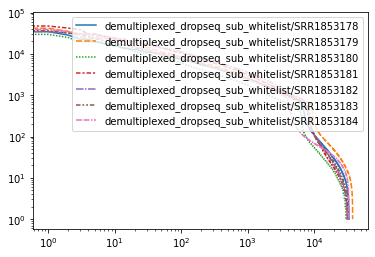

In [9]:
ax = sns.lineplot(data=barcode_rank_df)
ax.set_xscale('log')
ax.set_yscale('log')

Please note that this kneeplot is artificially good!!! All non-cells on the right of the knee are barcodes with 1 mismatch to the artificial whitelist (barcodes to left of knee). thousands of barcodes have already been removed during the barcode filtering stage.

In [10]:
ncells_dict = {
    '78': 6600,
    '79': 9000,
    '80': 6120,
    '81': 7650,
    '82': 7650,
    '83': 8280,
    '84': 4000,
}


In [11]:
barcode_rank_df.columns

Index(['demultiplexed_dropseq_sub_whitelist/SRR1853178',
       'demultiplexed_dropseq_sub_whitelist/SRR1853179',
       'demultiplexed_dropseq_sub_whitelist/SRR1853180',
       'demultiplexed_dropseq_sub_whitelist/SRR1853181',
       'demultiplexed_dropseq_sub_whitelist/SRR1853182',
       'demultiplexed_dropseq_sub_whitelist/SRR1853183',
       'demultiplexed_dropseq_sub_whitelist/SRR1853184'],
      dtype='object')

In [12]:
barcode_rank_df.columns = [barcode_rank_df.columns[x].replace('demultiplexed_dropseq_sub_whitelist/SRR18531', '') for x in range(len(barcode_rank_df.columns))]

In [13]:
for sample in barcode_rank_df.columns:
    incells = barcode_rank_df[sample][0:ncells_dict[sample]-1].sum()
    outcells = barcode_rank_df[sample][ncells_dict[sample]:].sum()
    total = barcode_rank_df[sample].sum()
    print(incells/total)

0.8832790072828945
0.8997888660124749
0.906590567535988
0.9331619562535133
0.9315229468690802
0.9269745604121185
0.8475774261027429


Please note that this FRIC is artificially good!!! All non-cells on the right of the knee are barcodes with 1 mismatch to the artificial whitelist (barcodes to left of knee). thousands of barcodes have already been removed during the barcode filtering stage.

# inDrop reads per cell

In [12]:
sorted(glob.glob('demultiplexed_indrop_index/*.Solo.out/Gene/Summary.csv'))

['demultiplexed_indrop_index/SRR10545068.Solo.out/Gene/Summary.csv',
 'demultiplexed_indrop_index/SRR10545069.Solo.out/Gene/Summary.csv',
 'demultiplexed_indrop_index/SRR10545070.Solo.out/Gene/Summary.csv',
 'demultiplexed_indrop_index/SRR10545071.Solo.out/Gene/Summary.csv',
 'demultiplexed_indrop_index/SRR10545072.Solo.out/Gene/Summary.csv',
 'demultiplexed_indrop_index/SRR10545073.Solo.out/Gene/Summary.csv',
 'demultiplexed_indrop_index/SRR10545074.Solo.out/Gene/Summary.csv',
 'demultiplexed_indrop_index/SRR10545075.Solo.out/Gene/Summary.csv',
 'demultiplexed_indrop_index/SRR10545076.Solo.out/Gene/Summary.csv',
 'demultiplexed_indrop_index/SRR10545077.Solo.out/Gene/Summary.csv',
 'demultiplexed_indrop_index/SRR10545078.Solo.out/Gene/Summary.csv',
 'demultiplexed_indrop_index/SRR10545079.Solo.out/Gene/Summary.csv',
 'demultiplexed_indrop_index/merged.Solo.out/Gene/Summary.csv']

In [22]:
metadata = []
for filename in sorted(glob.glob('demultiplexed_indrop_index/*.Solo.out/Gene/Summary.csv')):
    x = pd.read_csv(filename, header=None, index_col = 0)
    sample=filename.replace('demultiplexed_indrop/SRR105450', '')
    sample=sample.replace('.Solo.out/Gene/Summary.csv', '')
    x.columns = [sample]
    metadata.append(x)

metadata = pd.concat(metadata, axis = 1)
metadata = metadata.T

In [23]:
metadata

,Number of Reads,Reads With Valid Barcodes,Sequencing Saturation,Q30 Bases in CB+UMI,Q30 Bases in RNA read,Reads Mapped to Genome: Unique+Multiple,Reads Mapped to Genome: Unique,Reads Mapped to Transcriptome: Unique+Multipe Genes,Reads Mapped to Transcriptome: Unique Genes,Estimated Number of Cells,Reads in Cells Mapped to Unique Genes,Fraction of Reads in Cells,Mean Reads per Cell,Median Reads per Cell,UMIs in Cells,Mean UMI per Cell,Median UMI per Cell,Mean Genes per Cell,Median Genes per Cell,Total Genes Detected
demultiplexed_indrop_index/SRR10545068,1.362522e+08,0.421600,0.261272,0.834279,0.800453,0.488978,0.488978,0.290449,0.282861,13956.0,20664237.0,0.536171,1480.0,1256.0,14962203.0,1072.0,919.0,795.0,717.0,20789.0
demultiplexed_indrop_index/SRR10545069,1.030366e+08,0.352682,0.189946,0.734679,0.711272,0.450167,0.450167,0.233702,0.227481,12261.0,11801511.0,0.503501,962.0,801.0,9389434.0,765.0,644.0,598.0,529.0,19968.0
demultiplexed_indrop_index/SRR10545070,9.885942e+07,0.379293,0.190964,0.744584,0.710311,0.447653,0.447653,0.249041,0.242448,12213.0,12039080.0,0.502292,985.0,822.0,9569915.0,783.0,661.0,611.0,540.0,20043.0
demultiplexed_indrop_index/SRR10545071,1.006607e+08,0.363700,0.189410,0.737797,0.712597,0.452498,0.452498,0.241028,0.234622,12289.0,11903417.0,0.504016,968.0,806.0,9482639.0,771.0,650.0,603.0,533.0,20006.0
demultiplexed_indrop_index/SRR10545072,1.347892e+08,0.399197,0.251432,0.821007,0.798391,0.483215,0.483215,0.275268,0.268060,13859.0,19302616.0,0.534232,1392.0,1181.0,14163734.0,1021.0,875.0,764.0,689.0,20654.0
demultiplexed_indrop_index/SRR10545073,1.302101e+08,0.420346,0.252223,0.826554,0.791933,0.486340,0.486340,0.288692,0.281131,14029.0,19666338.0,0.537241,1401.0,1191.0,14424143.0,1028.0,884.0,768.0,694.0,20694.0
demultiplexed_indrop_index/SRR10545074,1.314736e+08,0.404533,0.248747,0.821661,0.796305,0.485901,0.485901,0.278873,0.271555,13880.0,19093006.0,0.534784,1375.0,1169.0,14063877.0,1013.0,869.0,759.0,685.0,20582.0
demultiplexed_indrop_index/SRR10545075,1.258430e+08,0.410132,0.251882,0.806074,0.767215,0.496859,0.496859,0.284408,0.277047,12864.0,18227794.0,0.522819,1416.0,1186.0,13304051.0,1034.0,882.0,770.0,690.0,20644.0
demultiplexed_indrop_index/SRR10545076,1.255973e+08,0.396990,0.247645,0.800275,0.773506,0.492923,0.492923,0.275899,0.268711,12663.0,17525358.0,0.519280,1383.0,1165.0,12859939.0,1015.0,868.0,759.0,681.0,20572.0
demultiplexed_indrop_index/SRR10545077,1.201732e+08,0.416573,0.246383,0.800100,0.757655,0.492646,0.492646,0.287707,0.280250,12586.0,17420675.0,0.517264,1384.0,1163.0,12813055.0,1018.0,868.0,761.0,683.0,20563.0


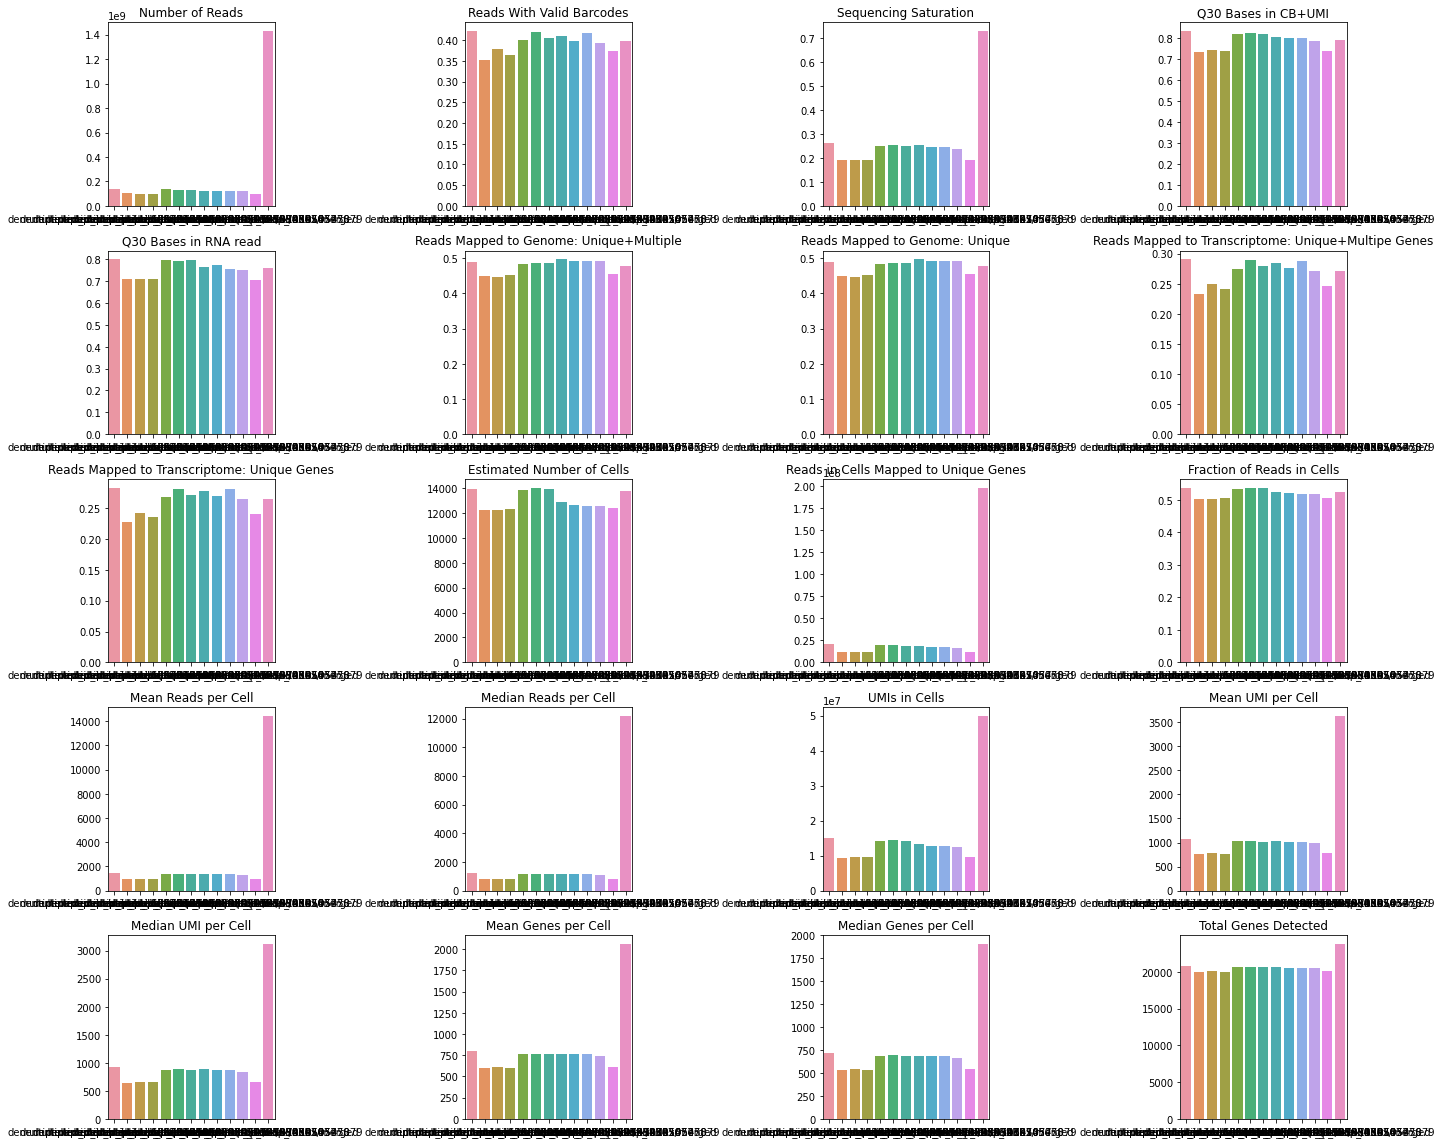

In [24]:
fig, axes =plt.subplots(5,4, figsize=(20,16))
axes = axes.flatten()
for statistic in range(0,metadata.shape[1]):
    sns.barplot(y = metadata[metadata.columns[statistic]], 
                x = metadata.index,
                ax = axes[statistic]
               ).set_title(metadata.columns[statistic])
    axes[statistic].set_ylabel('')
    # axes[statistic].get_xaxis().set_ticklabels([])

plt.tight_layout()
plt.gcf()
plt.savefig('plts_python/indrop_starsoloqc.png', dpi=150)
plt.show()
plt.close()

This is quite revealing. Note that the last sample (pinkish) matches our expectations: when you correctly merge all the fastqs, and then perform correct barcode demultiplexing, you get the expected number of median umis/genes.

In [25]:
metadata['reads_per_cell'] = metadata['Number of Reads']/metadata['Estimated Number of Cells']

In [26]:
metadata['reads_per_cell']

demultiplexed_indrop_index/SRR10545068      9762.981728
demultiplexed_indrop_index/SRR10545069      8403.608189
demultiplexed_indrop_index/SRR10545070      8094.605420
demultiplexed_indrop_index/SRR10545071      8191.120189
demultiplexed_indrop_index/SRR10545072      9725.749621
demultiplexed_indrop_index/SRR10545073      9281.496828
demultiplexed_indrop_index/SRR10545074      9472.159006
demultiplexed_indrop_index/SRR10545075      9782.571906
demultiplexed_indrop_index/SRR10545076      9918.447050
demultiplexed_indrop_index/SRR10545077      9548.167329
demultiplexed_indrop_index/SRR10545078      9640.742864
demultiplexed_indrop_index/SRR10545079      8114.000644
demultiplexed_indrop_index/merged         103957.690651
Name: reads_per_cell, dtype: float64

In [39]:
barcode_rank = []

for filename in sorted(glob.glob('demultiplexed_indrop_index/merged.Solo.out/Gene/UMIperCellSorted.txt')):
    x = pd.read_csv(filename, header=None)
    sample=filename.replace('demultiplexed_indrop/SRR105450', '')
    sample=sample.replace('.Solo.out/Gene/UMIperCellSorted.txt', '')
    x.columns = [sample]
    barcode_rank.append(x)

barcode_rank_df = pd.concat(barcode_rank, axis = 1)

In [40]:
barcode_rank_df

,demultiplexed_indrop_index/merged
0,41203
1,38021
2,27611
3,25914
4,24172
...,...
1313980,1
1313981,1
1313982,1
1313983,1


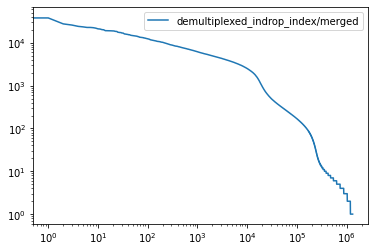

In [41]:
ax = sns.lineplot(data=barcode_rank_df)
ax.set_xscale('log')
ax.set_yscale('log')

In [42]:
barcode_rank_df[0:27093].sum()

demultiplexed_indrop_index/merged    63751280
dtype: int64

In [43]:
barcode_rank_df[27094:].sum()

demultiplexed_indrop_index/merged    38967051
dtype: int64

In [44]:
barcode_rank_df[0:27093].sum()/(barcode_rank_df[0:27093].sum()+barcode_rank_df[27094:].sum())

demultiplexed_indrop_index/merged    0.620642
dtype: float64

# Generate figure

In [39]:
ls tables/*adata*

tables/dropseq_SRR1853178_adata.tsv
tables/dropseq_SRR1853179_adata.tsv
tables/dropseq_SRR1853180_adata.tsv
tables/dropseq_SRR1853181_adata.tsv
tables/dropseq_SRR1853182_adata.tsv
tables/dropseq_SRR1853183_adata.tsv
tables/dropseq_SRR1853184_adata.tsv
tables/dropseq_whitelisted_SRR1853178_adata.tsv
tables/dropseq_whitelisted_SRR1853179_adata.tsv
tables/dropseq_whitelisted_SRR1853180_adata.tsv
tables/dropseq_whitelisted_SRR1853181_adata.tsv
tables/dropseq_whitelisted_SRR1853182_adata.tsv
tables/dropseq_whitelisted_SRR1853183_adata.tsv
tables/dropseq_whitelisted_SRR1853184_adata.tsv
tables/indrop_merged_adata.tsv


We need these tables:

```
tables/dropseq_whitelisted_SRR1853178_adata.tsv
tables/dropseq_whitelisted_SRR1853179_adata.tsv
tables/dropseq_whitelisted_SRR1853180_adata.tsv
tables/dropseq_whitelisted_SRR1853181_adata.tsv
tables/dropseq_whitelisted_SRR1853182_adata.tsv
tables/dropseq_whitelisted_SRR1853183_adata.tsv
tables/dropseq_whitelisted_SRR1853184_adata.tsv
tables/indrop_merged_adata.tsv
```

In [40]:
#### import scanpy as sc
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import figure
import numpy as np
import glob as glob

In [41]:
files = glob.glob('tables/dropseq_whitelisted*_adata.tsv')

In [42]:
files

['tables/dropseq_whitelisted_SRR1853182_adata.tsv',
 'tables/dropseq_whitelisted_SRR1853179_adata.tsv',
 'tables/dropseq_whitelisted_SRR1853184_adata.tsv',
 'tables/dropseq_whitelisted_SRR1853178_adata.tsv',
 'tables/dropseq_whitelisted_SRR1853181_adata.tsv',
 'tables/dropseq_whitelisted_SRR1853180_adata.tsv',
 'tables/dropseq_whitelisted_SRR1853183_adata.tsv']

In [43]:
df_dropseq_adata = pd.DataFrame()
for file in files:
    df = pd.read_csv(file, sep='\t', index_col=0, header=0)
    df_dropseq_adata = df_dropseq_adata.append(df)

In [44]:
df_dropseq_adata

,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,log1p_total_counts,pct_counts_in_top_50_genes,pct_counts_in_top_100_genes,pct_counts_in_top_200_genes,pct_counts_in_top_500_genes
SRR1853182_ACAGATTGGAAC,7526,8.926252,34639.0,10.452765,12.685124,17.841162,25.251884,38.892578
SRR1853182_CAGAATAGGCTT,7144,8.874168,29813.0,10.302733,13.376715,18.709959,26.069164,39.831617
SRR1853182_GAAAAGAACGAG,6971,8.849657,38458.0,10.557348,14.696552,21.995424,31.652712,47.605180
SRR1853182_GCTGGAGTTTCA,6906,8.840291,28311.0,10.251041,13.772032,19.261065,26.713998,40.591996
SRR1853182_GAAATCAACAGT,6504,8.780326,24016.0,10.086517,13.216189,18.479347,25.845270,39.765157
...,...,...,...,...,...,...,...,...
SRR1853183_ATTTATCAGGCA,366,5.905362,510.0,6.236370,33.529412,47.843137,67.450980,100.000000
SRR1853183_AGGGCCATGCAT,366,5.905362,515.0,6.246107,34.368932,48.349515,67.766990,100.000000
SRR1853183_CATTCGCTGGCT,366,5.905362,498.0,6.212606,31.726908,46.586345,66.666667,100.000000
SRR1853183_TGACGATCGCGT,366,5.905362,495.0,6.206576,30.505051,46.262626,66.464646,100.000000


In [45]:
df_dropseq_adata['n_genes_by_counts']

SRR1853182_ACAGATTGGAAC    7526
SRR1853182_CAGAATAGGCTT    7144
SRR1853182_GAAAAGAACGAG    6971
SRR1853182_GCTGGAGTTTCA    6906
SRR1853182_GAAATCAACAGT    6504
                           ... 
SRR1853183_ATTTATCAGGCA     366
SRR1853183_AGGGCCATGCAT     366
SRR1853183_CATTCGCTGGCT     366
SRR1853183_TGACGATCGCGT     366
SRR1853183_TGTTTGAGATTT     365
Name: n_genes_by_counts, Length: 49293, dtype: int64

In [46]:
df_dropseq_adata['total_counts']

SRR1853182_ACAGATTGGAAC    34639.0
SRR1853182_CAGAATAGGCTT    29813.0
SRR1853182_GAAAAGAACGAG    38458.0
SRR1853182_GCTGGAGTTTCA    28311.0
SRR1853182_GAAATCAACAGT    24016.0
                            ...   
SRR1853183_ATTTATCAGGCA      510.0
SRR1853183_AGGGCCATGCAT      515.0
SRR1853183_CATTCGCTGGCT      498.0
SRR1853183_TGACGATCGCGT      495.0
SRR1853183_TGTTTGAGATTT      472.0
Name: total_counts, Length: 49293, dtype: float64

## indrop

In [47]:
files = glob.glob('tables/indrop_merged_adata.tsv')

In [48]:
files

['tables/indrop_merged_adata.tsv']

In [49]:
df_indrop_adata = pd.DataFrame()
for file in files:
    df = pd.read_csv(file, sep='\t', index_col=0, header=0)
    df_indrop_adata = df_indrop_adata.append(df)

In [50]:
df_indrop_adata

,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,log1p_total_counts,pct_counts_in_top_50_genes,pct_counts_in_top_100_genes,pct_counts_in_top_200_genes,pct_counts_in_top_500_genes
merged_CTCCTCCA_ATTAGACG_TGTTCCAG,8136,9.004177,41203.0,10.626290,8.564910,14.045094,21.556683,35.363930
merged_GGCGACAA_TCTTACGC_GCGCATTC,8129,9.003316,38021.0,10.545920,8.784619,14.284211,21.929986,36.009048
merged_CAAGGTAC_ATTAGACG_ATCCGCTA,7448,8.915835,27611.0,10.226006,9.836659,14.975915,21.889827,35.478614
merged_AAGGGACC_ATAGCCTT_CCATTTGA,6867,8.834628,25914.0,10.162578,10.963186,16.975380,24.507988,38.666358
merged_GGCCCAAT_ACTCTAGG_TTGTGACT,6837,8.830251,24172.0,10.092992,11.662254,17.160351,24.652490,38.528049
...,...,...,...,...,...,...,...,...
merged_TCTGATTT_CTAGTCGA_CTCTTGAC,490,6.196444,576.0,6.357842,21.180556,32.291667,49.652778,100.000000
merged_ACCAGTTT_ATAGCCTT_GGGAAGGT,490,6.196444,555.0,6.320768,20.720721,29.729730,47.747748,100.000000
merged_ATTTGTTG_CTAGTCGA_GAGTTTCG,490,6.196444,568.0,6.343881,20.598592,31.338028,48.943662,100.000000
merged_TCTAAACT_TAAGGCTC_AACACACG,489,6.194405,539.0,6.291569,18.552876,27.829314,46.382189,100.000000


In [51]:
df_indrop_adata['n_genes_by_counts']

merged_CTCCTCCA_ATTAGACG_TGTTCCAG    8136
merged_GGCGACAA_TCTTACGC_GCGCATTC    8129
merged_CAAGGTAC_ATTAGACG_ATCCGCTA    7448
merged_AAGGGACC_ATAGCCTT_CCATTTGA    6867
merged_GGCCCAAT_ACTCTAGG_TTGTGACT    6837
                                     ... 
merged_TCTGATTT_CTAGTCGA_CTCTTGAC     490
merged_ACCAGTTT_ATAGCCTT_GGGAAGGT     490
merged_ATTTGTTG_CTAGTCGA_GAGTTTCG     490
merged_TCTAAACT_TAAGGCTC_AACACACG     489
merged_AACGATTT_TAAGGCTC_AGAAGTTA     489
Name: n_genes_by_counts, Length: 27093, dtype: int64

In [52]:
df_indrop_adata['total_counts']

merged_CTCCTCCA_ATTAGACG_TGTTCCAG    41203.0
merged_GGCGACAA_TCTTACGC_GCGCATTC    38021.0
merged_CAAGGTAC_ATTAGACG_ATCCGCTA    27611.0
merged_AAGGGACC_ATAGCCTT_CCATTTGA    25914.0
merged_GGCCCAAT_ACTCTAGG_TTGTGACT    24172.0
                                      ...   
merged_TCTGATTT_CTAGTCGA_CTCTTGAC      576.0
merged_ACCAGTTT_ATAGCCTT_GGGAAGGT      555.0
merged_ATTTGTTG_CTAGTCGA_GAGTTTCG      568.0
merged_TCTAAACT_TAAGGCTC_AACACACG      539.0
merged_AACGATTT_TAAGGCTC_AGAAGTTA      602.0
Name: total_counts, Length: 27093, dtype: float64

## HyDrop - mouse cortex data

our data is filtered by star-solo based on knee. we then convert these cells to h5ad format using scanpy

In [53]:
import scanpy as sc

In [56]:
adata = sc.read('tables/20210501_adata.h5ad')

In [58]:
adata.obs.to_csv('tables/hydrop_adata.tsv',sep='\t')

In [59]:
files = glob.glob('tables/hydrop_adata.tsv')

In [60]:
files

['tables/hydrop_adata.tsv']

In [61]:
df_hydrop_adata = pd.DataFrame()
for file in files:
    df = pd.read_csv(file, sep='\t', index_col=0, header=0)
    df_hydrop_adata = df_hydrop_adata.append(df)

In [62]:
df_hydrop_adata

,batch,n_genes,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,doublet_score,predicted_doublet,leiden_0.6,leiden_0.9,leiden_1.2,leiden_1,cell_type,cell_type_1,cell_type_finetuned,UMAP_X,UMAP_Y,TSNE_X,TSNE_Y,cell_type_collapsed
A_ATCGACCTTG_ACCAAGCGAA_AACAACCATC,0,2758,2756,7319.0,1.0,0.013663,0.021615,False,0,6,7,7,7-NP-b,7-L2/3,7-L2/3,-0.974888,1.350498,-22.595959,44.505940,L2/3-2
A_GAGGTTAATG_ACCAAGCGAA_AACAACCATC,0,3006,3005,8789.0,0.0,0.000000,0.009565,False,10,11,9,9,9-L4-f,9-L4,9-L4,5.260487,7.415311,-39.151596,-52.765900,L4-3
A_GATCTAGGTA_ACCTTGTATG_AACAACCATC,0,2491,2491,5689.0,0.0,0.000000,0.003378,False,5,5,5,6,6-L2/3,6-MGE-Pvalb,6-MGE-Pvalb,-0.638742,18.540974,36.406204,-70.331566,MGE (Pvalb+)
A_TTAACGAAGG_ACCTTGTATG_AACAACCATC,0,1888,1888,4044.0,3.0,0.074184,0.015164,False,2,1,0,1,1-L6-a,1-L6,1-L6,0.096323,-5.338323,49.871860,37.381763,L6
A_ACCTGAGATG_ACGAGACCAA_AACAACCATC,0,2826,2825,7267.0,6.0,0.082565,0.011981,False,2,1,0,1,1-L6-a,1-L6,1-L6,-1.193039,-4.463965,61.126038,29.700691,L6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
B_CTCCTGAATC_TGTGCTCTAA_TTGGATACGT,1,934,934,1485.0,1.0,0.067340,0.055646,False,12,15,16,15,15-MOL,15-MOL,15-MOL,-6.744222,8.804398,22.741667,-6.316557,MOL
B_GGATGAGGAG_TTAACAGTCA_TTGGATACGT,1,956,956,1544.0,0.0,0.000000,0.025308,False,0,0,2,0,0-L2/3,0-L2/3,0-L2/3,-4.163591,4.043092,-16.213620,12.958341,L2/3-1
B_AAGCCGCATA_TTGAGGCATC_TTGGATACGT,1,2708,2707,7717.0,1.0,0.012958,0.040744,False,1,2,6,5,5-MGE-Pvalb,5-L4,5-L4,-0.737559,7.552638,-50.390736,-3.990756,L4-2
B_TACATAGAGG_TTGAGGCATC_TTGGATACGT,1,2232,2231,5113.0,1.0,0.019558,0.015599,False,4,4,4,4,4-L4/5,4-L4/5,4-L4/5,3.978391,2.174218,2.101720,-20.454075,L4/5-2


In [65]:
df_hydrop_adata['n_genes_by_counts']

A_ATCGACCTTG_ACCAAGCGAA_AACAACCATC    2756
A_GAGGTTAATG_ACCAAGCGAA_AACAACCATC    3005
A_GATCTAGGTA_ACCTTGTATG_AACAACCATC    2491
A_TTAACGAAGG_ACCTTGTATG_AACAACCATC    1888
A_ACCTGAGATG_ACGAGACCAA_AACAACCATC    2825
                                      ... 
B_CTCCTGAATC_TGTGCTCTAA_TTGGATACGT     934
B_GGATGAGGAG_TTAACAGTCA_TTGGATACGT     956
B_AAGCCGCATA_TTGAGGCATC_TTGGATACGT    2707
B_TACATAGAGG_TTGAGGCATC_TTGGATACGT    2231
B_TGAGCAATCT_TTGAGGCATC_TTGGATACGT    1176
Name: n_genes_by_counts, Length: 9508, dtype: int64

In [66]:
df_hydrop_adata['total_counts']

A_ATCGACCTTG_ACCAAGCGAA_AACAACCATC    7319.0
A_GAGGTTAATG_ACCAAGCGAA_AACAACCATC    8789.0
A_GATCTAGGTA_ACCTTGTATG_AACAACCATC    5689.0
A_TTAACGAAGG_ACCTTGTATG_AACAACCATC    4044.0
A_ACCTGAGATG_ACGAGACCAA_AACAACCATC    7267.0
                                       ...  
B_CTCCTGAATC_TGTGCTCTAA_TTGGATACGT    1485.0
B_GGATGAGGAG_TTAACAGTCA_TTGGATACGT    1544.0
B_AAGCCGCATA_TTGAGGCATC_TTGGATACGT    7717.0
B_TACATAGAGG_TTGAGGCATC_TTGGATACGT    5113.0
B_TGAGCAATCT_TTGAGGCATC_TTGGATACGT    1845.0
Name: total_counts, Length: 9508, dtype: float64

# Make a nice figure

In [104]:
df_hydrop_ngenes = pd.DataFrame()
df_hydrop_numis = pd.DataFrame()

df_hydrop_ngenes['counts'] = df_hydrop_adata['n_genes_by_counts']
df_hydrop_ngenes['count_type'] = 'ngenes'
df_hydrop_numis['counts'] = df_hydrop_adata['total_counts']
df_hydrop_numis['count_type'] = 'numis'

df_hydrop = df_hydrop_ngenes.append(df_hydrop_numis, ignore_index=True)
df_hydrop['method'] = 'hydrop'

In [105]:
df_indrop_ngenes = pd.DataFrame()
df_indrop_numis = pd.DataFrame()

df_indrop_ngenes['counts'] = df_indrop_adata['n_genes_by_counts']
df_indrop_ngenes['count_type'] = 'ngenes'
df_indrop_numis['counts'] = df_indrop_adata['total_counts']
df_indrop_numis['count_type'] = 'numis'

df_indrop = df_indrop_ngenes.append(df_indrop_numis, ignore_index=True)
df_indrop['method'] = 'indrop'

In [106]:
df_dropseq_ngenes = pd.DataFrame()
df_dropseq_numis = pd.DataFrame()

df_dropseq_ngenes['counts'] = df_dropseq_adata['n_genes_by_counts']
df_dropseq_ngenes['count_type'] = 'ngenes'
df_dropseq_numis['counts'] = df_dropseq_adata['total_counts']
df_dropseq_numis['count_type'] = 'numis'

df_dropseq = df_dropseq_ngenes.append(df_dropseq_numis, ignore_index=True)
df_dropseq['method'] = 'dropseq'

# merge

In [107]:
import matplotlib.pyplot as plt
import seaborn as sns

In [108]:
context = "talk"
style = "darkgrid"
markersize = 25
plt.close()
sns.set_context(context)
sns.set_style(style, {"axes.linewidth": 1, "axes.edgecolor": ".20"})

In [109]:
df_counts = pd.concat([df_indrop, df_dropseq, df_hydrop], ignore_index=True)

In [110]:
df_counts

,counts,count_type,method
0,8136.0,ngenes,indrop
1,8129.0,ngenes,indrop
2,7448.0,ngenes,indrop
3,6867.0,ngenes,indrop
4,6837.0,ngenes,indrop
...,...,...,...
171783,1485.0,numis,hydrop
171784,1544.0,numis,hydrop
171785,7717.0,numis,hydrop
171786,5113.0,numis,hydrop


In [121]:
df_counts.groupby(['method', 'count_type']).median()

counts
method  count_type        
dropseq ngenes       743.0
        numis       1071.0
hydrop  ngenes      1661.0
        numis       3403.5
indrop  ngenes      1321.0
        numis       1920.0

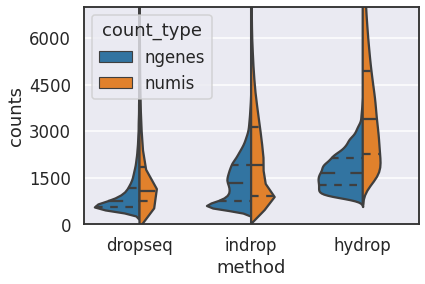

In [124]:
ax = sns.violinplot(data=df_counts, y='counts', x='method', hue='count_type', split=True, inner="quartile", size='count', order=[ "dropseq", "indrop", "hydrop"])
ax.yaxis.set_major_locator(plt.MaxNLocator(5))
plt.ylim([0,7000])
plt.savefig('plts_pub/compar_public.svg')

plt.show()

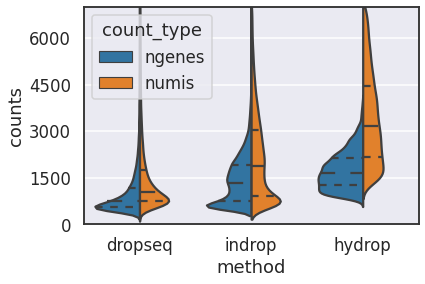

In [123]:
# i can choose not to plot the cells with counts > 7000 in order to smoothen the curve
ax = sns.violinplot(data=df_counts[df_counts['counts'] < 7000], y='counts', x='method', hue='count_type', split=True, inner="quartile", size='counts', order=[ "dropseq", "indrop", "hydrop"])
ax.yaxis.set_major_locator(plt.MaxNLocator(5))
plt.ylim([0,7000])
plt.savefig('plts_pub/compar_public_soft.svg')

plt.show()

# STAR stats figure

In [1]:
import scanpy as sc
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import figure
import numpy as np
import glob as glob

### HyDrop reads per cell

In [31]:
!cat /lustre1/project/stg_00002/lcb/fderop/data/20210428_hydrop-rna_mouse_cortex_10k/demultiplexed/HYR__c47998_e6244b__20210412_mouse_cortex_sbmerged_S4.Solo.out/Gene/Summary.csv

Number of Reads,269012338
Reads With Valid Barcodes,0.827878
Sequencing Saturation,0.659605
Q30 Bases in CB+UMI,0.780043
Q30 Bases in RNA read,0.954299
Reads Mapped to Genome: Unique+Multiple,0.859785
Reads Mapped to Genome: Unique,0.859785
Reads Mapped to Transcriptome: Unique+Multipe Genes,0.559121
Reads Mapped to Transcriptome: Unique Genes,0.550297
Estimated Number of Cells,4459
Reads in Cells Mapped to Unique Genes,50489518
Fraction of Reads in Cells,0.341061
Mean Reads per Cell,11323
Median Reads per Cell,9793
UMIs in Cells,16851724
Mean UMI per Cell,3779
Median UMI per Cell,3265
Mean Genes per Cell,1718
Median Genes per Cell,1624
Total Genes Detected,21483


In [33]:
269012338/4459

60330.194662480375

In [32]:
!cat /lustre1/project/stg_00002/lcb/fderop/data/20210428_hydrop-rna_mouse_cortex_10k/demultiplexed/HYR__666332__20210412_mouse_cortex_sa_S1.Solo.out/Gene/Summary.csv

Number of Reads,242071788
Reads With Valid Barcodes,0.83327
Sequencing Saturation,0.551516
Q30 Bases in CB+UMI,0.774848
Q30 Bases in RNA read,0.950998
Reads Mapped to Genome: Unique+Multiple,0.859084
Reads Mapped to Genome: Unique,0.859084
Reads Mapped to Transcriptome: Unique+Multipe Genes,0.56905
Reads Mapped to Transcriptome: Unique Genes,0.560225
Estimated Number of Cells,5232
Reads in Cells Mapped to Unique Genes,47987067
Fraction of Reads in Cells,0.353848
Mean Reads per Cell,9171
Median Reads per Cell,7941
UMIs in Cells,21186594
Mean UMI per Cell,4049
Median UMI per Cell,3514
Mean Genes per Cell,1778
Median Genes per Cell,1693
Total Genes Detected,21719


In [34]:
242071788/5232

46267.543577981654

In [35]:
# for a total of 
(269012338+242071788)/(4459+5232)

52738.01733567227

# DropSeq reads per cell

In [14]:
sorted(glob.glob('demultiplexed_dropseq/*.Solo.out/Gene/Summary.csv'))

['demultiplexed_dropseq/SRR1853178.Solo.out/Gene/Summary.csv',
 'demultiplexed_dropseq/SRR1853179.Solo.out/Gene/Summary.csv',
 'demultiplexed_dropseq/SRR1853180.Solo.out/Gene/Summary.csv',
 'demultiplexed_dropseq/SRR1853181.Solo.out/Gene/Summary.csv',
 'demultiplexed_dropseq/SRR1853182.Solo.out/Gene/Summary.csv',
 'demultiplexed_dropseq/SRR1853183.Solo.out/Gene/Summary.csv',
 'demultiplexed_dropseq/SRR1853184.Solo.out/Gene/Summary.csv']

In [23]:
metadata = []
for filename in sorted(glob.glob('demultiplexed_dropseq/*.Solo.out/Gene/Summary.csv')):
    x = pd.read_csv(filename, header=None, index_col = 0)
    sample=filename.replace('demultiplexed_dropseq/SRR18531', '')
    sample=sample.replace('.Solo.out/Gene/Summary.csv', '')
    x.columns = [sample]
    metadata.append(x)

metadata = pd.concat(metadata, axis = 1)
metadata = metadata.T

In [24]:
metadata

,Number of Reads,Reads With Valid Barcodes,Sequencing Saturation,Q30 Bases in CB+UMI,Q30 Bases in RNA read,Reads Mapped to Genome: Unique+Multiple,Reads Mapped to Genome: Unique,Reads Mapped to Transcriptome: Unique+Multipe Genes,Reads Mapped to Transcriptome: Unique Genes,Estimated Number of Cells,Reads in Cells Mapped to Unique Genes,Fraction of Reads in Cells,Mean Reads per Cell,Median Reads per Cell,UMIs in Cells,Mean UMI per Cell,Median UMI per Cell,Mean Genes per Cell,Median Genes per Cell,Total Genes Detected
78,510210716.0,1.0,0.757257,NaN,0.620940,0.545704,0.545704,0.372239,0.362322,2629.0,54743780.0,0.296135,20823.0,15973.0,7773057.0,2956.0,2202.0,1651.0,1391.0,22048.0
79,524537760.0,1.0,0.768773,NaN,0.620952,0.543425,0.543425,0.376026,0.365333,2208.0,57388174.0,0.299472,25991.0,19780.0,7713453.0,3493.0,2625.0,1863.0,1603.0,22163.0
80,411365100.0,1.0,0.830703,NaN,0.566498,0.542113,0.542113,0.363961,0.353768,1697.0,52238936.0,0.358962,30783.0,22655.0,4566499.0,2690.0,1953.0,1527.0,1266.0,21708.0
81,486748074.0,1.0,0.674636,NaN,0.608495,0.332314,0.332314,0.239943,0.233840,1798.0,38185717.0,0.335488,21237.0,15512.0,8390763.0,4666.0,3400.0,2211.0,1907.0,22145.0
82,491102701.0,1.0,0.771998,NaN,0.637598,0.535425,0.535425,0.382315,0.372148,2221.0,67329155.0,0.368397,30314.0,23341.0,10082819.0,4539.0,3363.0,2182.0,1872.0,22631.0
83,438843919.0,1.0,0.844932,NaN,0.591365,0.551568,0.551568,0.435267,0.423811,2249.0,79424580.0,0.427044,35315.0,26822.0,6949914.0,3090.0,2272.0,1716.0,1447.0,21949.0
84,494030802.0,1.0,0.725467,NaN,0.600765,0.562359,0.562359,0.416486,0.405025,1953.0,45691499.0,0.228349,23395.0,16929.0,8016444.0,4104.0,2916.0,2005.0,1688.0,21366.0


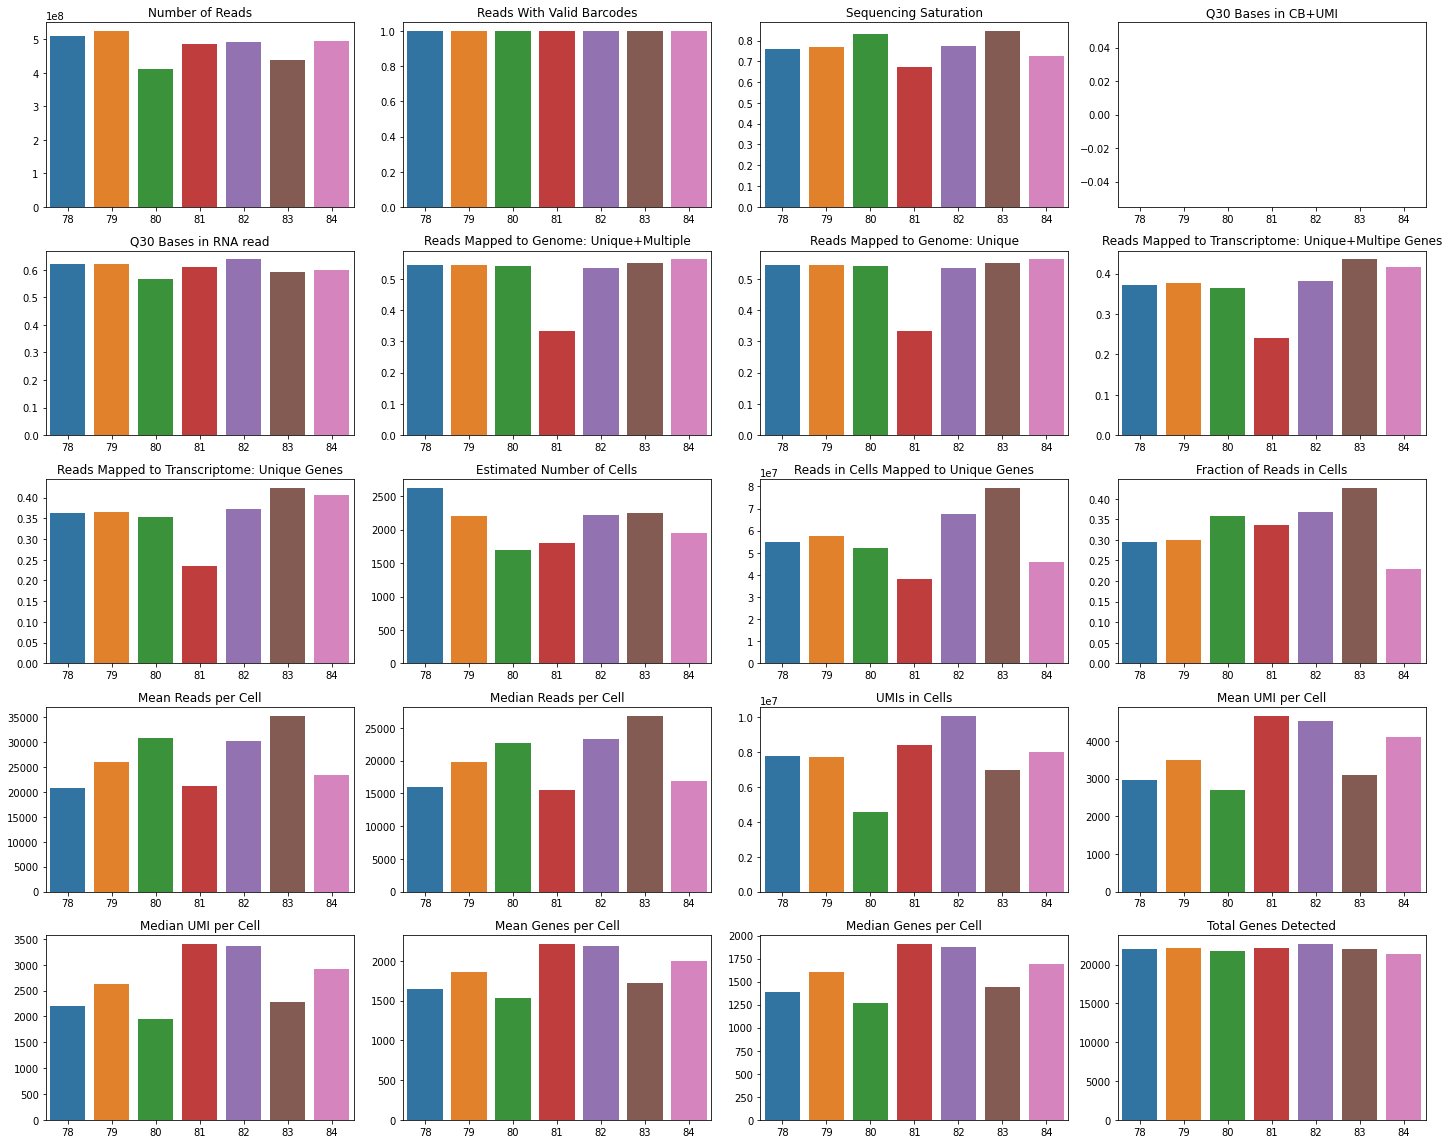

In [27]:
fig, axes =plt.subplots(5,4, figsize=(20,16))
axes = axes.flatten()
for statistic in range(0,metadata.shape[1]):
    sns.barplot(y = metadata[metadata.columns[statistic]], 
                x = metadata.index,
                ax = axes[statistic]
               ).set_title(metadata.columns[statistic])
    axes[statistic].set_ylabel('')
    # axes[statistic].get_xaxis().set_ticklabels([])

plt.tight_layout()
plt.gcf()
plt.savefig('plts_python/indrop_starsoloqc.png', dpi=150)
plt.show()
plt.close()

In [28]:
metadata['reads_per_cell'] = metadata['Number of Reads']/metadata['Estimated Number of Cells']

In [29]:
metadata['reads_per_cell']

78    194070.260936
79    237562.391304
80    242407.248085
81    270716.392659
82    221117.830257
83    195128.465540
84    252959.960061
Name: reads_per_cell, dtype: float64

However, are the cell counts correct? let's check the barcode rank

In [70]:
barcode_rank = []

for filename in sorted(glob.glob('demultiplexed_dropseq/*.Solo.out/Gene/UMIperCellSorted.txt')):
    x = pd.read_csv(filename, header=None)
    sample=filename.replace('demultiplexed_dropseq/SRR18531', '')
    sample=sample.replace('.Solo.out/Gene/UMIperCellSorted.txt', '')
    x.columns = [sample]
    barcode_rank.append(x)

barcode_rank_df = pd.concat(barcode_rank, axis = 1)

In [71]:
barcode_rank_df

,78,79,80,81,82,83,84
0,41406.0,62367.0,31556.0,51504.0,40531.0,41327.0,58096
1,35519.0,41695.0,31014.0,51300.0,35922.0,36248.0,48799
2,30759.0,35492.0,26181.0,43563.0,34216.0,31154.0,42013
3,24208.0,26080.0,20343.0,40019.0,33016.0,29709.0,41568
4,23948.0,24701.0,20324.0,31841.0,32256.0,26778.0,38505
...,...,...,...,...,...,...,...
7231648,NaN,NaN,NaN,NaN,NaN,NaN,1
7231649,NaN,NaN,NaN,NaN,NaN,NaN,1
7231650,NaN,NaN,NaN,NaN,NaN,NaN,1
7231651,NaN,NaN,NaN,NaN,NaN,NaN,1


In [75]:
barcode_rank_df[0:500000]

,78,79,80,81,82,83,84
0,41406.0,62367.0,31556.0,51504.0,40531.0,41327.0,58096
1,35519.0,41695.0,31014.0,51300.0,35922.0,36248.0,48799
2,30759.0,35492.0,26181.0,43563.0,34216.0,31154.0,42013
3,24208.0,26080.0,20343.0,40019.0,33016.0,29709.0,41568
4,23948.0,24701.0,20324.0,31841.0,32256.0,26778.0,38505
...,...,...,...,...,...,...,...
499995,9.0,9.0,5.0,5.0,6.0,4.0,15
499996,9.0,9.0,5.0,5.0,6.0,4.0,15
499997,9.0,9.0,5.0,5.0,6.0,4.0,15
499998,9.0,9.0,5.0,5.0,6.0,4.0,15


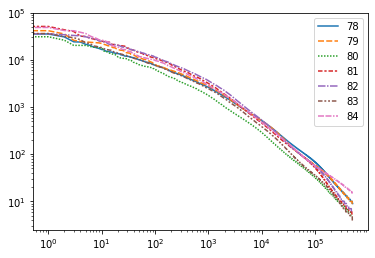

In [76]:
ax = sns.lineplot(data=barcode_rank_df[0:500000])
ax.set_xscale('log')
ax.set_yscale('log')

In [86]:
df_genes_dropseq = pd.read_csv('/lustre1/project/stg_00002/lcb/fderop/data/20210513_indrop_mouse_cortex/df_ngenes_cat_dropseq.csv', sep='\t')
df_umis_dropseq = pd.read_csv('/lustre1/project/stg_00002/lcb/fderop/data/20210513_indrop_mouse_cortex/df_numis_cat_dropseq.csv', sep='\t')
df_genes_dropseq.columns = ['bc', 'genes']
df_umis_dropseq.columns = ['bc', 'umis']

In [96]:
df_genes_dropseq

,bc,genes
0,AACCCCTCCAGG,8373.0
1,GATCTATCGAAT,6493.0
2,CGCCAGGAATTT,6106.0
3,GTCACACCTGTT,5918.0
4,TTTTTAGGATGC,6127.0
...,...,...
49295,AGTAAGTAGCCA,289.0
49296,GACATCAAACAA,241.0
49297,AGTGTTTATCAA,248.0
49298,GCCGTGCGCTTG,259.0


In [95]:
df_genes_dropseq.median(axis=0)

genes    518.0
dtype: float64

Ok, so it's near impossible to filter cells from here, basically.  
> PCA was first performed on a 13,155-cell “training set” of the 49,300-cell dataset, using single-cell libraries in which transcripts from >900 genes were detected. We found this approach was more effective in discovering structures corresponding to rare cell types than performing PCA on the full dataset, which was dominated by numerous, tiny rod photoreceptors (Supplemental Experimental Procedures). Thirty-two statistically significant PCs were identified using a permutation test and independently confirmed using a modified resampling procedure (Chung and Storey, 2015
). We projected individual cells within the training set based on their PC scores onto a single two-dimensional map using t-Distributed Stochastic Neighbor Embedding (t-SNE) (van der Maaten and Hinton, 2008
). The remaining 36,145 single-cell libraries (<900 genes detected) were next projected on this t-SNE map, based on their representation within the PC-subspace of the training set (Berman et al., 2014
, Shekhar et al., 2014
).

In [89]:
df_genes_dropseq[df_genes_dropseq['genes']>=900]

,bc,genes
0,AACCCCTCCAGG,8373.0
1,GATCTATCGAAT,6493.0
2,CGCCAGGAATTT,6106.0
3,GTCACACCTGTT,5918.0
4,TTTTTAGGATGC,6127.0
...,...,...
44018,CGGAGAATCAAG,902.0
44041,CCTATAGTAGCA,922.0
44143,GCTGTTAGTACA,1070.0
44197,CAAGCAGTGGTA,1067.0


After all, they do seem to use all of their cells, so, we take the number of drop-seq cells as the number of lines in the supplementary drop-seq .tsv files, and use this number to downsample the drop-seq data. Then, I will take the top n cells from each downsampled matrix.

In [111]:
for file in sorted(glob.glob('/lustre1/project/stg_00002/lcb/fderop/data/20210513_indrop_mouse_cortex/*.bcs')):
    bcs = pd.read_csv(file, sep='\t')
    print(f'{file.replace("/lustre1/project/stg_00002/lcb/fderop/data/20210513_indrop_mouse_cortex/", "")}: {len(bcs.columns)-1}')

GSM1626793_P14Retina_1.digital_expression.txt.bcs: 6600
GSM1626794_P14Retina_2.digital_expression.txt.bcs: 9000
GSM1626795_P14Retina_3.digital_expression.txt.bcs: 6120
GSM1626796_P14Retina_4.digital_expression.txt.bcs: 7650
GSM1626797_P14Retina_5.digital_expression.txt.bcs: 7650
GSM1626798_P14Retina_6.digital_expression.txt.bcs: 8280
GSM1626799_P14Retina_7.digital_expression.txt.bcs: 4000


These are suspiciously round numbers... Yet, we don't have a better alternative. Let's continue. We need 52738 reads per cell.

In [112]:
for file in sorted(glob.glob('/lustre1/project/stg_00002/lcb/fderop/data/20210513_indrop_mouse_cortex/*.bcs')):
    bcs = pd.read_csv(file, sep='\t')
    print(f'{file.replace("/lustre1/project/stg_00002/lcb/fderop/data/20210513_indrop_mouse_cortex/", "")}: {(len(bcs.columns)-1)*52738}')

GSM1626793_P14Retina_1.digital_expression.txt.bcs: 348070800
GSM1626794_P14Retina_2.digital_expression.txt.bcs: 474642000
GSM1626795_P14Retina_3.digital_expression.txt.bcs: 322756560
GSM1626796_P14Retina_4.digital_expression.txt.bcs: 403445700
GSM1626797_P14Retina_5.digital_expression.txt.bcs: 403445700
GSM1626798_P14Retina_6.digital_expression.txt.bcs: 436670640
GSM1626799_P14Retina_7.digital_expression.txt.bcs: 210952000


Now, randomly sample from this in the following notebook.

# inDrop reads per cell

In [77]:
sorted(glob.glob('demultiplexed_indrop/*.Solo.out/Gene/Summary.csv'))

['demultiplexed_indrop/SRR10545068.Solo.out/Gene/Summary.csv',
 'demultiplexed_indrop/SRR10545069.Solo.out/Gene/Summary.csv',
 'demultiplexed_indrop/SRR10545070.Solo.out/Gene/Summary.csv',
 'demultiplexed_indrop/SRR10545071.Solo.out/Gene/Summary.csv',
 'demultiplexed_indrop/SRR10545072.Solo.out/Gene/Summary.csv',
 'demultiplexed_indrop/SRR10545073.Solo.out/Gene/Summary.csv',
 'demultiplexed_indrop/SRR10545074.Solo.out/Gene/Summary.csv']

In [37]:
metadata = []
for filename in sorted(glob.glob('demultiplexed_indrop/*.Solo.out/Gene/Summary.csv')):
    x = pd.read_csv(filename, header=None, index_col = 0)
    sample=filename.replace('demultiplexed_indrop/SRR105450', '')
    sample=sample.replace('.Solo.out/Gene/Summary.csv', '')
    x.columns = [sample]
    metadata.append(x)

metadata = pd.concat(metadata, axis = 1)
metadata = metadata.T

In [38]:
metadata

,Number of Reads,Reads With Valid Barcodes,Sequencing Saturation,Q30 Bases in CB+UMI,Q30 Bases in RNA read,Reads Mapped to Genome: Unique+Multiple,Reads Mapped to Genome: Unique,Reads Mapped to Transcriptome: Unique+Multipe Genes,Reads Mapped to Transcriptome: Unique Genes,Estimated Number of Cells,Reads in Cells Mapped to Unique Genes,Fraction of Reads in Cells,Mean Reads per Cell,Median Reads per Cell,UMIs in Cells,Mean UMI per Cell,Median UMI per Cell,Mean Genes per Cell,Median Genes per Cell,Total Genes Detected
68,136252173.0,0.440879,0.266368,0.832998,0.800453,0.488978,0.488978,0.301477,0.293621,14363.0,24349722.0,0.608644,1695.0,1432.0,17563343.0,1222.0,1044.0,896.0,806.0,21125.0
69,103036640.0,0.381989,0.196112,0.732578,0.711272,0.450167,0.450167,0.249958,0.243351,12538.0,14228154.0,0.567445,1134.0,945.0,11255164.0,897.0,755.0,692.0,612.0,20384.0
70,98859416.0,0.408675,0.196926,0.746938,0.710311,0.447653,0.447653,0.264455,0.257502,12668.0,14533296.0,0.570907,1147.0,955.0,11493802.0,907.0,764.0,699.0,619.0,20493.0
71,100660676.0,0.391889,0.195025,0.739465,0.712597,0.452498,0.452498,0.255742,0.248998,12618.0,14276253.0,0.569584,1131.0,942.0,11315094.0,896.0,756.0,692.0,612.0,20449.0
72,134789164.0,0.416603,0.255584,0.817862,0.798391,0.483215,0.483215,0.284974,0.277531,14249.0,22663375.0,0.605839,1590.0,1343.0,16585294.0,1163.0,992.0,861.0,775.0,21013.0


! Note that all the below statistics which are calculated on STARsolo filtered cells are inaccurate for these samples, as STARsolo is unable to filter cells from background barcodes due to the weak knee in these samples.

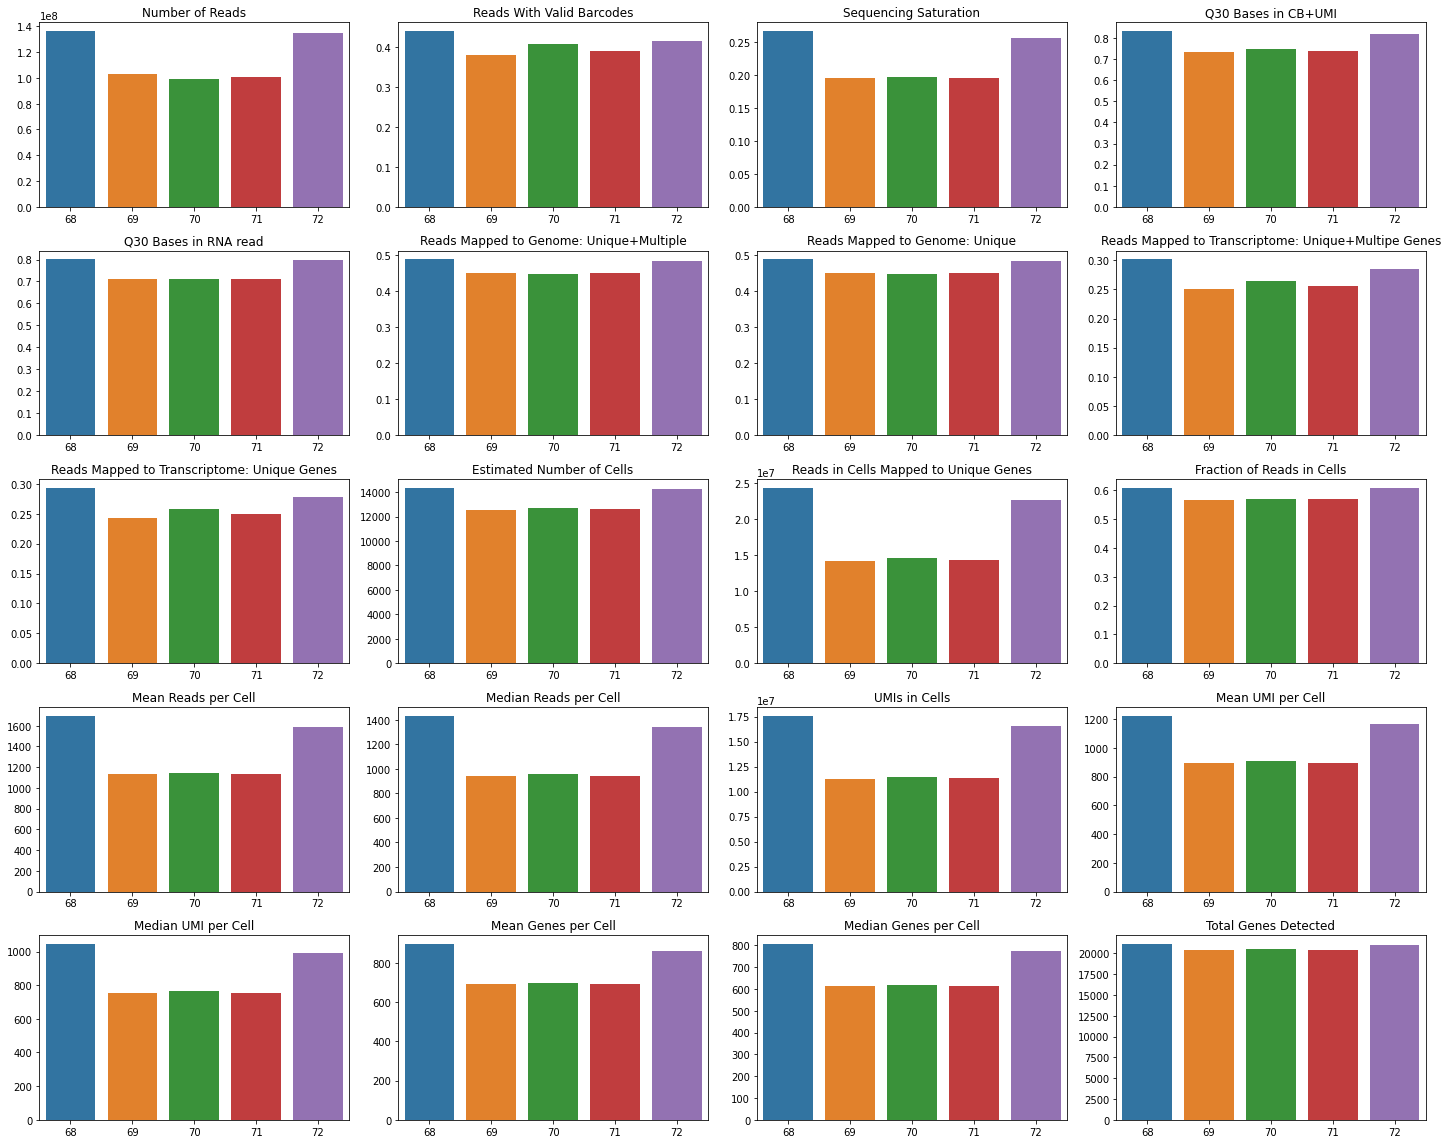

In [39]:
fig, axes =plt.subplots(5,4, figsize=(20,16))
axes = axes.flatten()
for statistic in range(0,metadata.shape[1]):
    sns.barplot(y = metadata[metadata.columns[statistic]], 
                x = metadata.index,
                ax = axes[statistic]
               ).set_title(metadata.columns[statistic])
    axes[statistic].set_ylabel('')
    # axes[statistic].get_xaxis().set_ticklabels([])

plt.tight_layout()
plt.gcf()
plt.savefig('plts_python/dropseq_starsoloqc.png', dpi=150)
plt.show()
plt.close()

In [40]:
metadata['reads_per_cell'] = metadata['Number of Reads']/metadata['Estimated Number of Cells']

In [41]:
metadata['reads_per_cell']

68    9486.331059
69    8217.948636
70    7803.869277
71    7977.546045
72    9459.552530
Name: reads_per_cell, dtype: float64

In [3]:
barcode_rank = []

for filename in sorted(glob.glob('demultiplexed_indrop/*.Solo.out/Gene/UMIperCellSorted.txt')):
    x = pd.read_csv(filename, header=None)
    sample=filename.replace('demultiplexed_indrop/SRR105450', '')
    sample=sample.replace('.Solo.out/Gene/UMIperCellSorted.txt', '')
    x.columns = [sample]
    barcode_rank.append(x)

barcode_rank_df = pd.concat(barcode_rank, axis = 1)

In [4]:
barcode_rank_df

,68,69,70,71,72,73,74,75,76,77,78,79
0,16960,13597.0,13953.0,13676.0,16178.0,16420.0,16084.0,17290.0,16661.0,16806.0,16387.0,14197.0
1,12395,8573.0,8751.0,8492.0,11513.0,11846.0,11469.0,11568.0,10942.0,10977.0,10536.0,8820.0
2,8845,6572.0,6641.0,6514.0,8429.0,8431.0,8213.0,8075.0,7817.0,7865.0,7695.0,6890.0
3,8543,6041.0,6300.0,6245.0,7850.0,8067.0,7957.0,8026.0,7813.0,7670.0,7595.0,6285.0
4,8292,5921.0,5802.0,5983.0,7827.0,7999.0,7738.0,7786.0,7342.0,7302.0,7277.0,6053.0
...,...,...,...,...,...,...,...,...,...,...,...,...
145125,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
145126,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
145127,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
145128,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
barcode_rank_df[0:500000]

,68,69,70,71,72,73,74,75,76,77,78,79
0,16960,13597.0,13953.0,13676.0,16178.0,16420.0,16084.0,17290.0,16661.0,16806.0,16387.0,14197.0
1,12395,8573.0,8751.0,8492.0,11513.0,11846.0,11469.0,11568.0,10942.0,10977.0,10536.0,8820.0
2,8845,6572.0,6641.0,6514.0,8429.0,8431.0,8213.0,8075.0,7817.0,7865.0,7695.0,6890.0
3,8543,6041.0,6300.0,6245.0,7850.0,8067.0,7957.0,8026.0,7813.0,7670.0,7595.0,6285.0
4,8292,5921.0,5802.0,5983.0,7827.0,7999.0,7738.0,7786.0,7342.0,7302.0,7277.0,6053.0
...,...,...,...,...,...,...,...,...,...,...,...,...
145125,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
145126,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
145127,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
145128,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


/staging/leuven/stg_00002/lcb/fderop/software_2/anaconda3/envs/python36/lib/python3.6/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


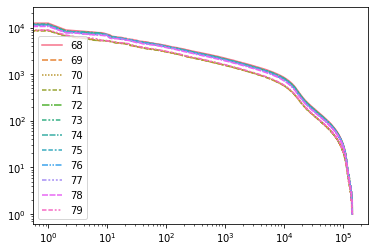

In [6]:
ax = sns.lineplot(data=barcode_rank_df[0:500000])
ax.set_xscale('log')
ax.set_yscale('log')

Again tough to tell where the true cells are.  
> After initial quality filtering (>500 genes detected per nucleus), the dataset of developmental samples contained 31,293 nuclei, detecting on average 1,913 transcripts (unique molecular identifiers [UMIs]) and 1,244 genes per nucleus (see SI Appendix, Fig. S1, for quality control metrics).

Let's see how many cells have > 500 genes. For this, we load the original count matrix:

In [24]:
files = glob.glob("/lustre1/project/stg_00002/lcb/fderop/data/20210513_indrop_mouse_cortex/GSE140883*.tsv")
files

['/lustre1/project/stg_00002/lcb/fderop/data/20210513_indrop_mouse_cortex/GSE140883_P10_2.tsv',
 '/lustre1/project/stg_00002/lcb/fderop/data/20210513_indrop_mouse_cortex/GSE140883_P15TR_1.tsv',
 '/lustre1/project/stg_00002/lcb/fderop/data/20210513_indrop_mouse_cortex/GSE140883_P20NR_2.tsv',
 '/lustre1/project/stg_00002/lcb/fderop/data/20210513_indrop_mouse_cortex/GSE140883_P15TR_2.tsv',
 '/lustre1/project/stg_00002/lcb/fderop/data/20210513_indrop_mouse_cortex/GSE140883_P15NR_1.tsv',
 '/lustre1/project/stg_00002/lcb/fderop/data/20210513_indrop_mouse_cortex/GSE140883_P15NR_2.tsv',
 '/lustre1/project/stg_00002/lcb/fderop/data/20210513_indrop_mouse_cortex/GSE140883_P20TR_1.tsv',
 '/lustre1/project/stg_00002/lcb/fderop/data/20210513_indrop_mouse_cortex/GSE140883_P10_1.tsv',
 '/lustre1/project/stg_00002/lcb/fderop/data/20210513_indrop_mouse_cortex/GSE140883_P20TR_2.tsv',
 '/lustre1/project/stg_00002/lcb/fderop/data/20210513_indrop_mouse_cortex/GSE140883_P20NR_1.tsv']

In [ ]:
df_numis_cat = pd.DataFrame()
df_ngenes_cat = pd.DataFrame()
for file in files:
    name = file.replace('/lustre1/project/stg_00002/lcb/fderop/data/20210513_indrop_mouse_cortex/', '')
    name = name.replace('.tsv', '')
    
    df = pd.read_csv(file, sep='\t', index_col=0)
    df_numis = df.sum(axis=1)
    df_ngenes = (df >= 1).astype(int).sum(axis=1)
    
    df_numis.to_csv(name + '.numis.tsv', sep='\t', header=None)
    df_ngenes.to_csv(name + '.ngenes.tsv', sep='\t', header=None)

In [56]:
barcode_rank = []

for filename in sorted(glob.glob('GSE140*.ngenes.tsv')):
    x = pd.read_csv(filename, header=None, sep='\t')
    sample=filename.replace('.tsv', '')
    x.columns = ['bc', sample]
    barcode_rank.append(x[sample])

barcode_rank_df = pd.concat(barcode_rank, axis = 1)

In [57]:
barcode_rank_df

,GSE140883_P10_1.ngenes,GSE140883_P10_2.ngenes,GSE140883_P15NR_1.ngenes,GSE140883_P15NR_2.ngenes,GSE140883_P15TR_1.ngenes,GSE140883_P15TR_2.ngenes,GSE140883_P20NR_1.ngenes,GSE140883_P20NR_2.ngenes,GSE140883_P20TR_1.ngenes,GSE140883_P20TR_2.ngenes
0,8270.0,5468.0,6209.0,6132.0,6254,4346.0,6434.0,8712.0,5378.0,6712.0
1,2656.0,2712.0,3224.0,3703.0,3043,1896.0,1973.0,2328.0,2324.0,3151.0
2,2428.0,2377.0,2140.0,2713.0,2702,1531.0,1809.0,1665.0,2067.0,1868.0
3,1962.0,1931.0,1958.0,2357.0,2580,1358.0,1634.0,1402.0,2194.0,1872.0
4,2089.0,1930.0,1692.0,2677.0,2060,1364.0,1574.0,1666.0,1725.0,1745.0
...,...,...,...,...,...,...,...,...,...,...
16226,NaN,NaN,NaN,NaN,160,NaN,NaN,NaN,NaN,NaN
16227,NaN,NaN,NaN,NaN,156,NaN,NaN,NaN,NaN,NaN
16228,NaN,NaN,NaN,NaN,151,NaN,NaN,NaN,NaN,NaN
16229,NaN,NaN,NaN,NaN,96,NaN,NaN,NaN,NaN,NaN


In [59]:
pd.DataFrame(barcode_rank_df >= 500).sum()

GSE140883_P10_1.ngenes      3600
GSE140883_P10_2.ngenes      2724
GSE140883_P15NR_1.ngenes    2082
GSE140883_P15NR_2.ngenes    2247
GSE140883_P15TR_1.ngenes    4128
GSE140883_P15TR_2.ngenes    2094
GSE140883_P20NR_1.ngenes    1995
GSE140883_P20NR_2.ngenes    1172
GSE140883_P20TR_1.ngenes    2550
GSE140883_P20TR_2.ngenes    2337
dtype: int64

In [61]:
pd.DataFrame(barcode_rank_df >= 500).sum().sum()

24929

In [62]:
pd.DataFrame(barcode_rank_df > 500).sum().sum()

24891

This does not match the > 30k as reported in Kalish et al. As noted in notebook 1, this is because they filter on umis instead of genes. This is an error in the manuscript.

In [49]:
barcode_rank = []

for filename in sorted(glob.glob('GSE140*.numis.tsv')):
    x = pd.read_csv(filename, header=None, sep='\t')
    sample=filename.replace('.tsv', '')
    x.columns = ['bc', sample]
    barcode_rank.append(x[sample])

barcode_rank_df = pd.concat(barcode_rank, axis = 1)

In [50]:
barcode_rank_df

,GSE140883_P10_1.numis,GSE140883_P10_2.numis,GSE140883_P15NR_1.numis,GSE140883_P15NR_2.numis,GSE140883_P15TR_1.numis,GSE140883_P15TR_2.numis,GSE140883_P20NR_1.numis,GSE140883_P20NR_2.numis,GSE140883_P20TR_1.numis,GSE140883_P20TR_2.numis
0,55128.0,19807.0,26172.0,22916.0,24812,10792.0,25732.0,59411.0,17285.0,31337.0
1,4567.0,4734.0,6491.0,7789.0,5438,2894.0,3306.0,3986.0,3797.0,6276.0
2,4437.0,3940.0,3280.0,4592.0,4535,2175.0,2746.0,2720.0,3300.0,2783.0
3,3076.0,3037.0,3074.0,3875.0,4415,1935.0,2558.0,2213.0,3452.0,2869.0
4,3694.0,3080.0,2506.0,4564.0,3262,1884.0,2374.0,2502.0,2629.0,2614.0
...,...,...,...,...,...,...,...,...,...,...
16226,NaN,NaN,NaN,NaN,183,NaN,NaN,NaN,NaN,NaN
16227,NaN,NaN,NaN,NaN,183,NaN,NaN,NaN,NaN,NaN
16228,NaN,NaN,NaN,NaN,171,NaN,NaN,NaN,NaN,NaN
16229,NaN,NaN,NaN,NaN,110,NaN,NaN,NaN,NaN,NaN


In [54]:
pd.DataFrame(barcode_rank_df > 500).sum()

GSE140883_P10_1.numis      4951
GSE140883_P10_2.numis      3632
GSE140883_P15NR_1.numis    2369
GSE140883_P15NR_2.numis    2714
GSE140883_P15TR_1.numis    5791
GSE140883_P15TR_2.numis    2416
GSE140883_P20NR_1.numis    2203
GSE140883_P20NR_2.numis    1415
GSE140883_P20TR_1.numis    3101
GSE140883_P20TR_2.numis    2747
dtype: int64

In [53]:
pd.DataFrame(barcode_rank_df > 500).sum().sum()

31339

That looks more like it. 31,293 is the number reported in the manuscript. I can now use these cell numbers to downsample the fastqs to.

In [64]:
pd.DataFrame(barcode_rank_df > 500).sum()*52738

GSE140883_P10_1.ngenes      189540372
GSE140883_P10_2.ngenes      143500098
GSE140883_P15NR_1.ngenes    109536826
GSE140883_P15NR_2.ngenes    118291334
GSE140883_P15TR_1.ngenes    217175084
GSE140883_P15TR_2.ngenes    110380634
GSE140883_P20NR_1.ngenes    105106834
GSE140883_P20NR_2.ngenes     61703460
GSE140883_P20TR_1.ngenes    134323686
GSE140883_P20TR_2.ngenes    123143230
dtype: int64

therefore follows:
reads per sample required:
```
GSE140883_P10_1.ngenes      189540372
GSE140883_P10_2.ngenes      143500098
GSE140883_P15NR_1.ngenes    109536826
GSE140883_P15NR_2.ngenes    118291334
GSE140883_P15TR_1.ngenes    217175084
GSE140883_P15TR_2.ngenes    110380634
GSE140883_P20NR_1.ngenes    105106834
GSE140883_P20NR_2.ngenes     61703460
GSE140883_P20TR_1.ngenes    134323686
GSE140883_P20TR_2.ngenes    123143230
```
However, it was here that I discovered that the Kalish et al. data was not sample-demultiplexed, but a big, undemultiplexed pool of 10 conditions. It appears that the authors uploaded lane-split data to GEO, instead of condition-split. I found 12 SRR runs associated with this manuscript: SRR10545068 to SRR10545079 (https://www.ncbi.nlm.nih.gov/sra?LinkName=biosample_sra&from_uid=13412802)

From the `fastq-load.py` options specified on SRA, I deducted that these 12 SRR runs stem from 3 sequencing runs each split into 4 lanes.
```
    SRR10545075: AC021817_S0_L001
    SRR10545076: AC021817_S0_L002
    SRR10545077: AC021817_S0_L003
    SRR10545078: AC021817_S0_L004
    SRR10545079: AC021917_S0_L001
    SRR10545069: AC021917_S0_L002
    SRR10545070: AC021917_S0_L003
    SRR10545071: AC021917_S0_L004
    SRR10545068: AC022617_S0_L001
    SRR10545072: AC022617_S0_L002
    SRR10545073: AC022617_S0_L003
    SRR10545074: AC022617_S0_L004
```
And then, in the matadata, every sample is "associated" with every file. This is problematic. One could naively downsample the entire pooled data so that the depth matches `31339*52738 = 1652756182` reads. However, at 31k cells, and a whitelist of 147k, barcode collision is imminent. It is therefore that I need the indices used. In order to do that, I will now try to extract the barcodes myself. I will make a distribution of all sequences in R3. This should reflect a heavy bias towards the indices used.

Proceed to next notebook to see how that was done.

From the raw barcode counting, we find the following. The top 25 indices found are the following:

```
ACTCTAGG        16095561
CGGAGAGA        14974567
CTAGTCGA        13418313
CTTAATAG        12366598
ATTAGACG        11911075
AGCTAGAA        10436684
TCGCATAA        10137372
TCTTACGC        9862491
TAAGGCTC        9322569
ATAGCCTT        8961285
AGATCTCG        2129831
ATTAGCCG        318959
TAAGGCGC        299836
ACTCGAGG        285249
AGCGAGAA        271526
GGGGGGGG        260505
ATAGCCGT        227021
ATAGCCTG        221338
CTTAAAAG        216772
CTTAAGAG        193067
AATAGACG        192551
CAAGTCGA        187937
CATAATAG        171597
ACTCAAGG        169423
ACGCATAA        155244
```

It is clear that the top 10 will correspond to the 10 samples, as there is a sharp decline from rank 10 to 11. I use this to generate a new barcode whitelist in notebook 4c.

In [16]:
count = 0
for file in glob.glob('fastq_indrop/*readcount.txt'):
    df = pd.read_csv(file, header=None)
    count = count + df[0]/4

print(int(count))

1428898458


Then, we downsample the pool fractionally. The entire Kalish et al. pool has 1 428 898 458 reads and 31,293 cells, leading to 45661 reads per cell. This is lower than the 52738 reads per cell used in Hydrop. However, since Kalish et al use a completely arbitrary cell filter of > 500 genes (UMIs), I can also adjust the cell filtering so that the read depth matches hydrop. We proceed as following: 1 428 898 458 reads / 52738 = 27094 cells. I will take the top 27094 cells from the mapped Kalish data.

First, we need to remap the indrop using their sample indices.